<a href="https://colab.research.google.com/github/adityakastwar/Machine-Learning-Projects/blob/main/Imbalanced_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()

pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')

In [11]:
df=pd.read_csv('bank-full.csv')

In [12]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [14]:
month_to_int = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

df['month'] = df['month'].apply(lambda x: month_to_int[x])

In [15]:
for column in df.select_dtypes(include='object').columns:
    if len(df[column].unique()) == 2:
        df[column] = df[column].apply(lambda x: 1 if x == 'yes' else 0)

In [16]:
obj_columns = df.select_dtypes(include='object').columns
df['job']=lbl_encoder.fit_transform(df[['job']])
df['marital']=lbl_encoder.fit_transform(df[['marital']])
df['education']=lbl_encoder.fit_transform(df[['education']])
df['housing']=lbl_encoder.fit_transform(df[['housing']])
df['loan']=lbl_encoder.fit_transform(df[['loan']])
df['poutcome']=lbl_encoder.fit_transform(df[['poutcome']])
df['contact']=lbl_encoder.fit_transform(df[['contact']])
df[df.select_dtypes(include='bool').columns] = df[df.select_dtypes(include='bool').columns].astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [17]:
numerical_feature = []
categorical_feature = []

for column in df.columns:
    if column == "Target":
        continue
    elif len(df[column].unique()) <= 10:
        categorical_feature.append(column)
    else:
        numerical_feature.append(column)

In [18]:
# create df with no outliers seperately (cuz somehow it affected some categorical feature)
no_outlier_df = df.copy()
for column in numerical_feature:
    IQR = no_outlier_df[column].quantile(0.75) - no_outlier_df[column].quantile(0.25)
    lower_bound = no_outlier_df[column].quantile(0.25) - 1.5 * IQR
    upper_bound = no_outlier_df[column].quantile(0.75) + 1.5 * IQR
    no_outlier_df = no_outlier_df[(no_outlier_df[column] >= lower_bound) & (no_outlier_df[column] <= upper_bound)]

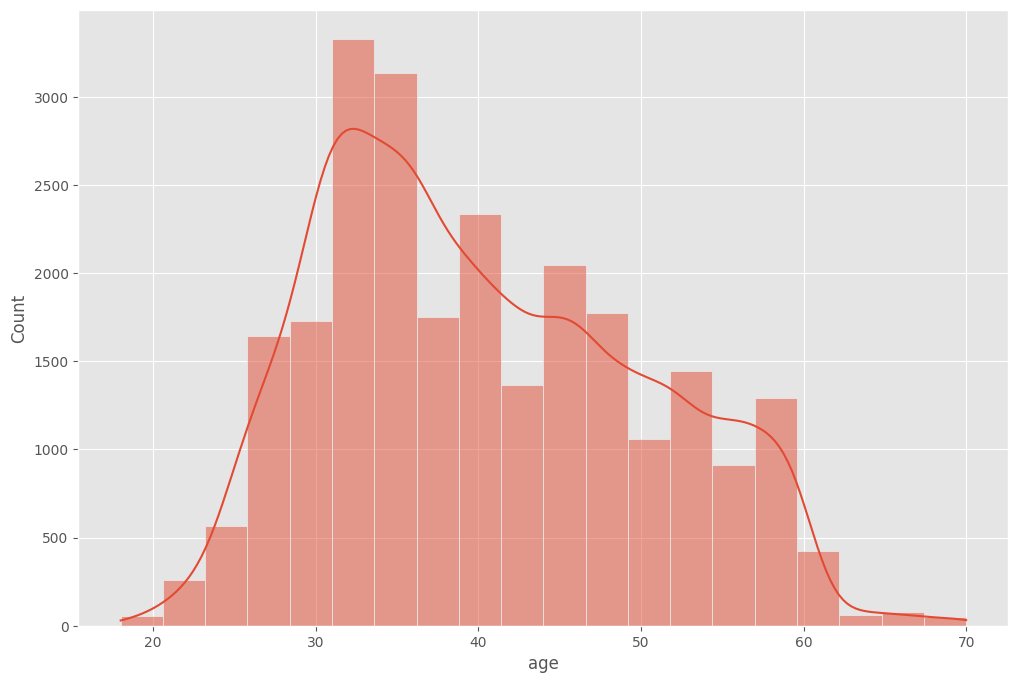

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(data=no_outlier_df['age'], kde=True, bins=20)

plt.show()

In [20]:
df_1 = no_outlier_df[numerical_feature + ['Target']] \
    .melt(id_vars='Target', value_vars=numerical_feature,
         var_name='feature_name', value_name='feature_value')

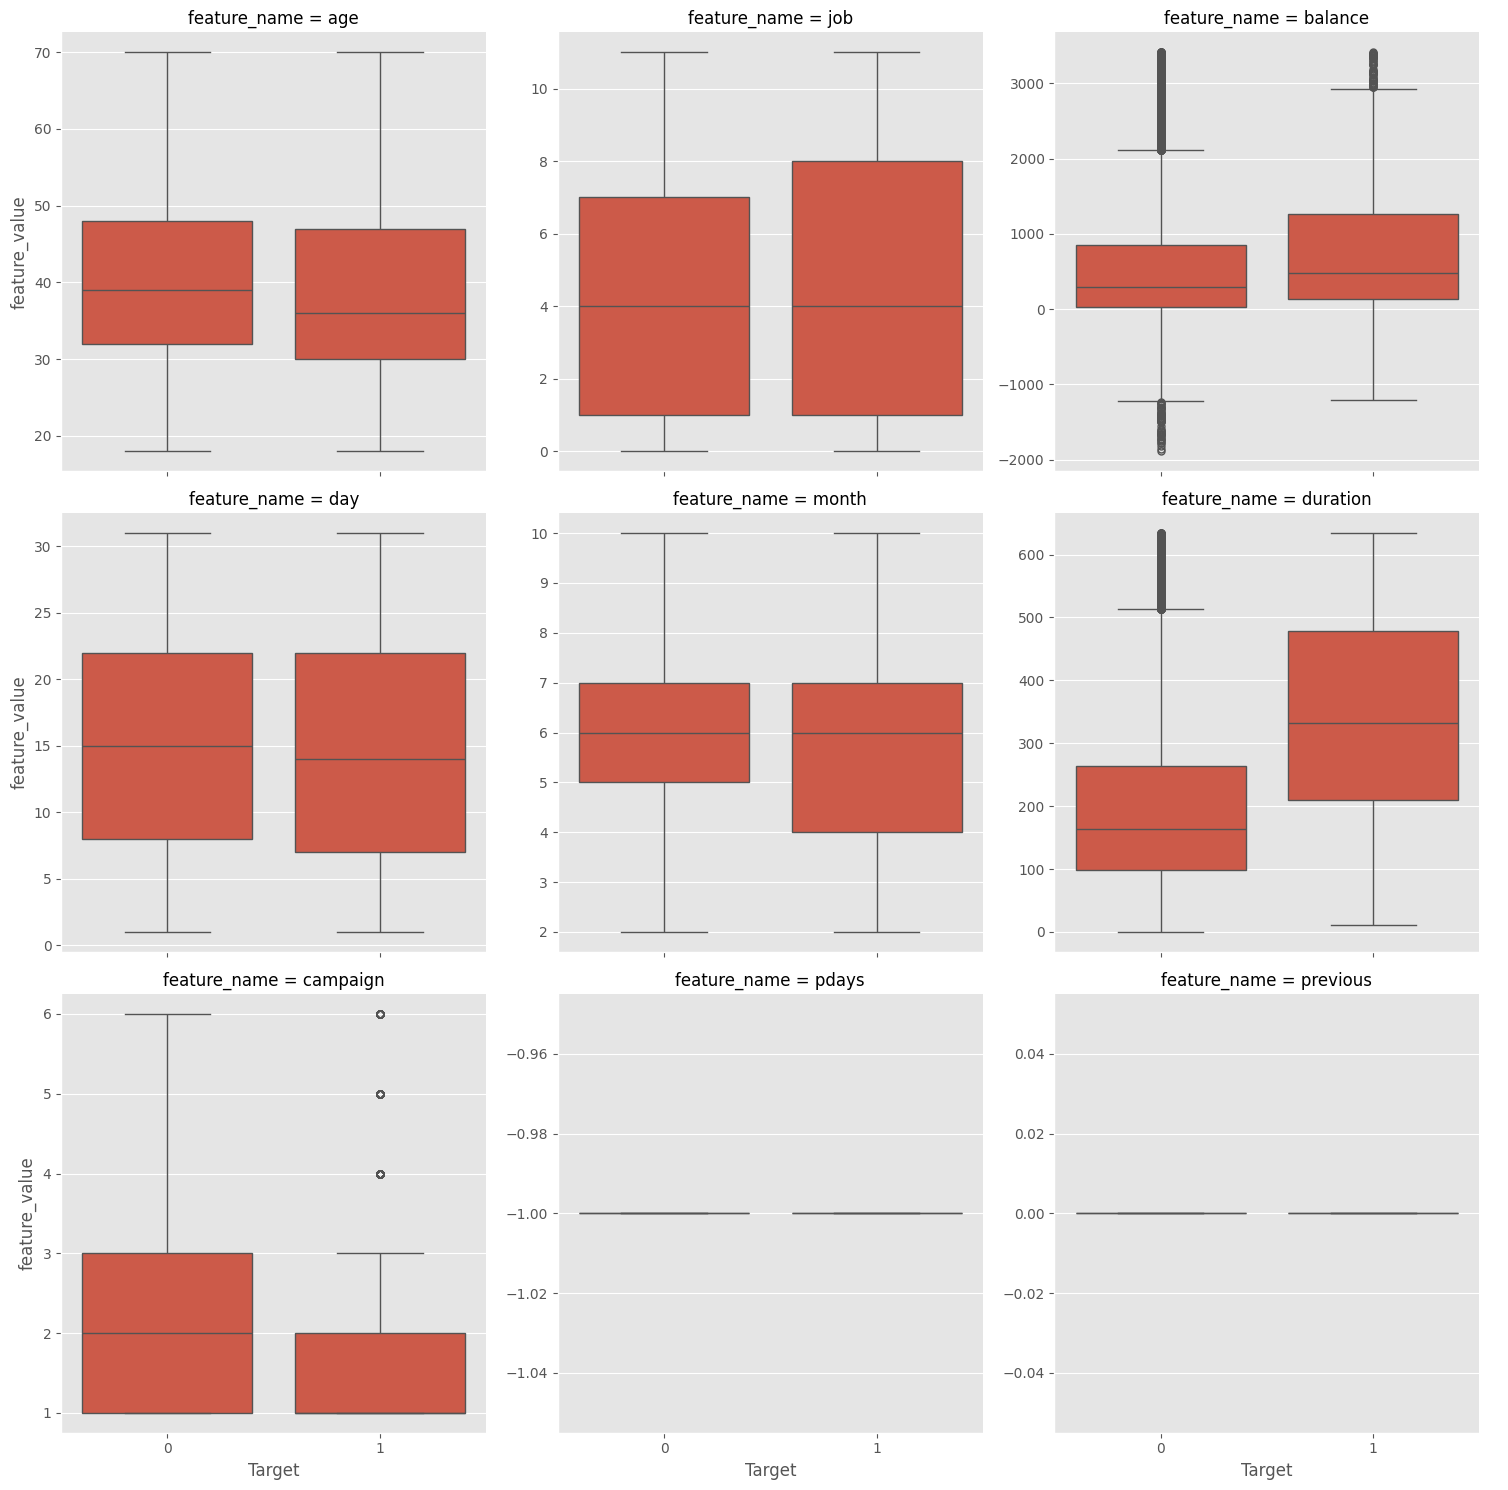

In [21]:
sns.catplot(kind='box', data=df_melted,
           x='Target', y='feature_value',
           col='feature_name', col_wrap=3, sharey=False)

plt.show()

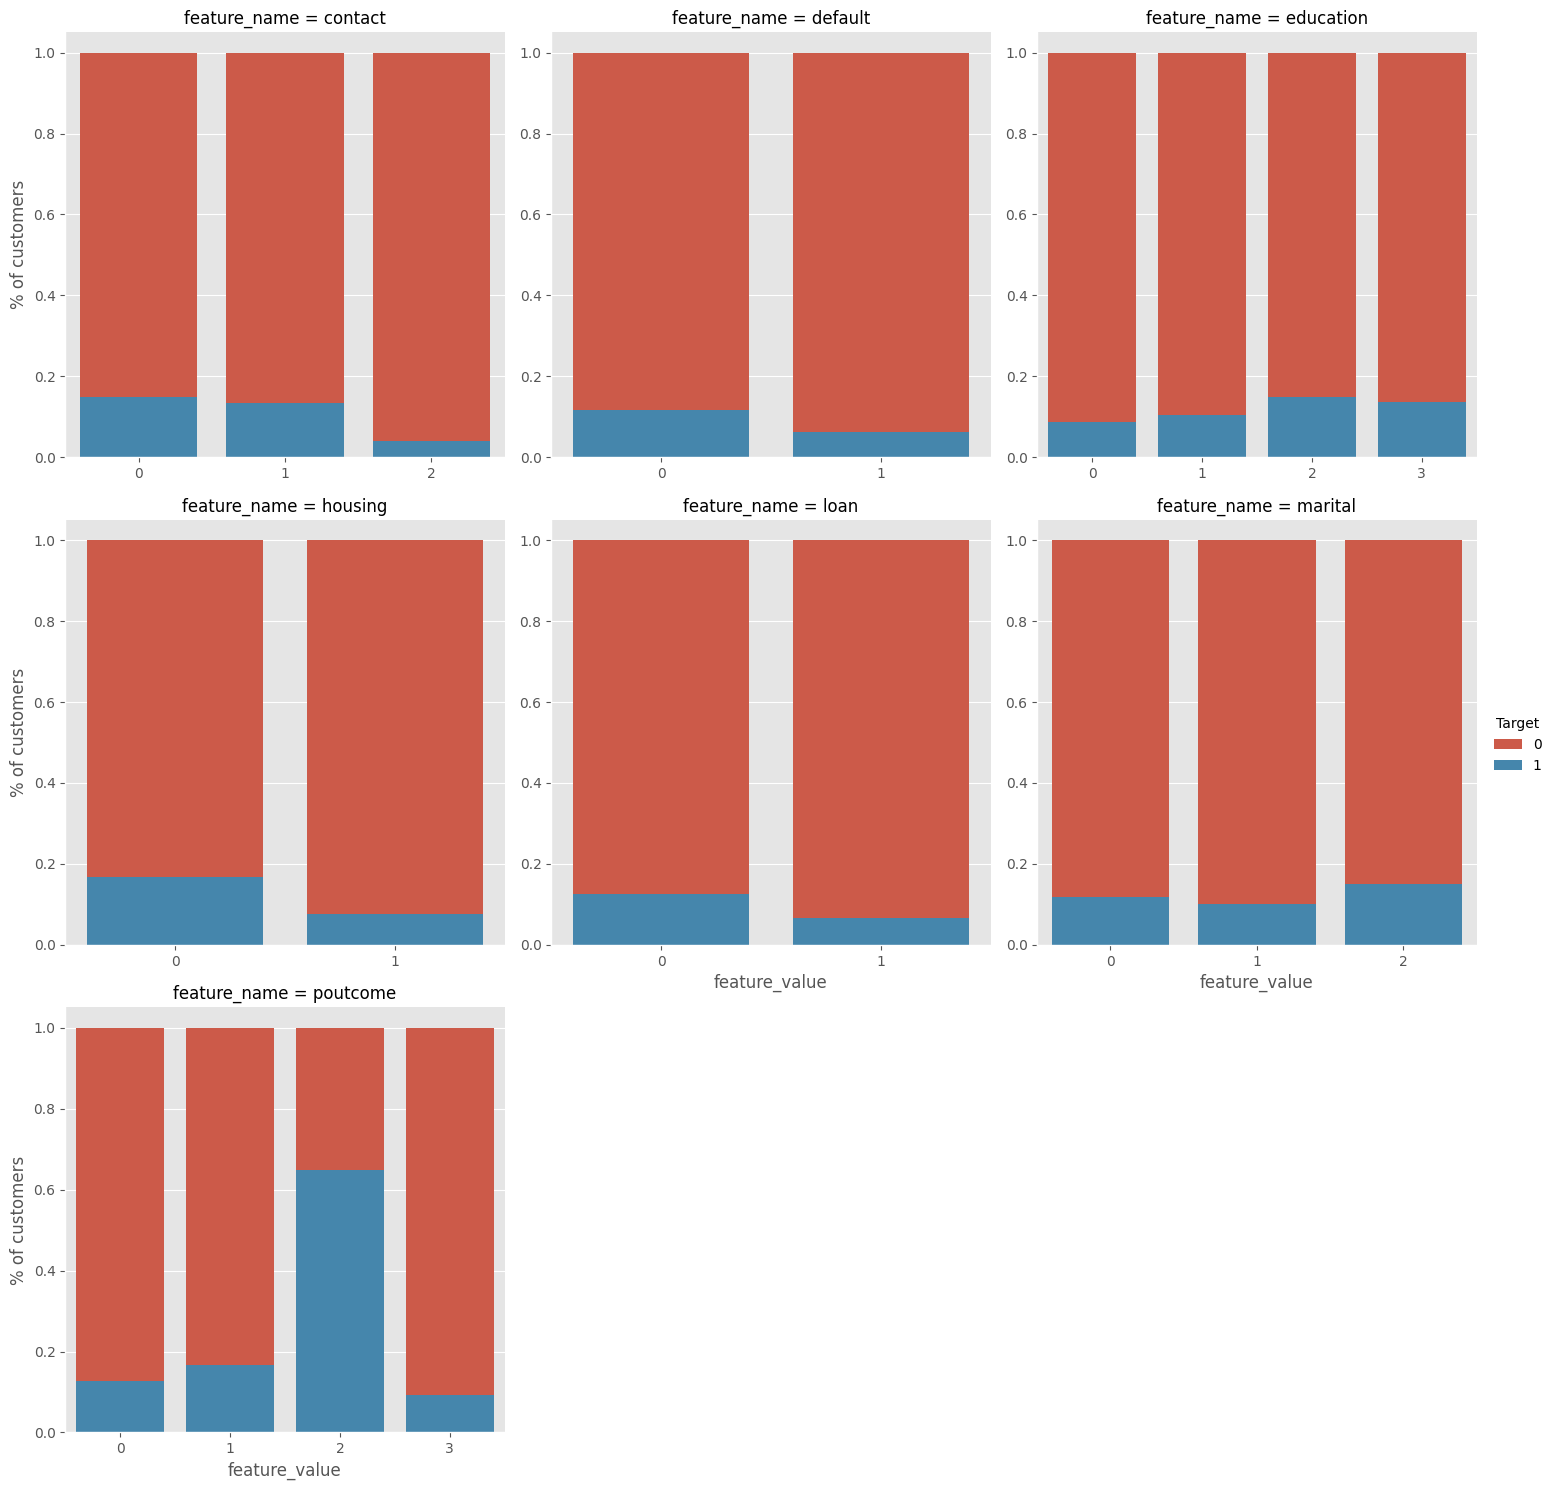

In [37]:
df_1 = df[categorical_feature + ['Target']] \
    .melt(id_vars='Target', value_vars=categorical_feature,
         var_name='feature_name', value_name='feature_value')

df_1['count'] = 1
df_1 = df_1.groupby(['feature_name', 'feature_value', 'Target'])[['count']].sum() \
    .reset_index(names=['feature_name','feature_value', 'Target']) \
    .sort_values(['feature_name', 'feature_value', 'Target'], ascending=[True, True, False])

df_grouped_total = df_1.groupby(['feature_name', 'feature_value'])[['count']].sum() \
    .reset_index(names=['feature_name','feature_value'])

df_1 = df_1.merge(df_grouped_total, on=['feature_name', 'feature_value'])
df_1['pctg_count'] = df_1['count_x'] / df_1['count_y']

df_1['% of customers'] = df_1.groupby(['feature_name','feature_value']) \
    .rolling(2, min_periods=1).sum()['pctg_count'].values
sns.catplot(kind='bar', data=df_1, x='feature_value', y='% of customers',
            hue='Target', col='feature_name', col_wrap=3,
            sharey=False, sharex=False, estimator='sum', dodge=False)

plt.show()

In [23]:
X = df.drop(columns=['Target']).values
y = df['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      7980
           1       0.36      0.48      0.41      1063

    accuracy                           0.84      9043
   macro avg       0.64      0.68      0.66      9043
weighted avg       0.86      0.84      0.85      9043



In [26]:
print(Counter(y_pred))
print(Counter(y_test))

Counter({0: 7607, 1: 1436})
Counter({0: 7980, 1: 1063})


In [27]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n', Counter(y_test), '\n', Counter(y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.57      0.21      0.30      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043


 Counter({0: 7980, 1: 1063}) 
 Counter({0: 8652, 1: 391})


In [29]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7980
           1       0.53      0.35      0.42      1063

    accuracy                           0.89      9043
   macro avg       0.72      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043



In [31]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [32]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.62      0.75      7980
           1       0.22      0.84      0.35      1063

    accuracy                           0.64      9043
   macro avg       0.60      0.73      0.55      9043
weighted avg       0.88      0.64      0.70      9043



In [34]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n', Counter(y_test), '\n', Counter(y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88      7980
           1       0.35      0.78      0.48      1063

    accuracy                           0.80      9043
   macro avg       0.66      0.79      0.68      9043
weighted avg       0.89      0.80      0.83      9043


 Counter({0: 7980, 1: 1063}) 
 Counter({0: 6639, 1: 2404})
